求$$y'=1+y^2,y(0)=0$$的数值解（分别用欧拉显格式、梯形预估修正格式、4阶龙格库塔格式，并用解析解比较这三种格式的收敛性）

In [8]:
# 导入用到的Python包
import numpy as np
import sympy as sp
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import leastsq
from IPython.display import display, Math
# 初始化全局变量
sp.init_printing()
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
h = 0.01
M = int(1 / h)


def f(y):
    return 1+y**2


def euler(t, y0, a, b):
    t = np.linspace(a, b, M)
    y = np.zeros(M)
    y[0] = y0
    for k in range(M - 1):
        y[k + 1] = y[k] + h * f(y[k])


display(pd.DataFrame(list(zip(t, y))[-10:], columns=['$t$', '$y$']))
display(Math(r'\cdots'))

NameError: name 't' is not defined

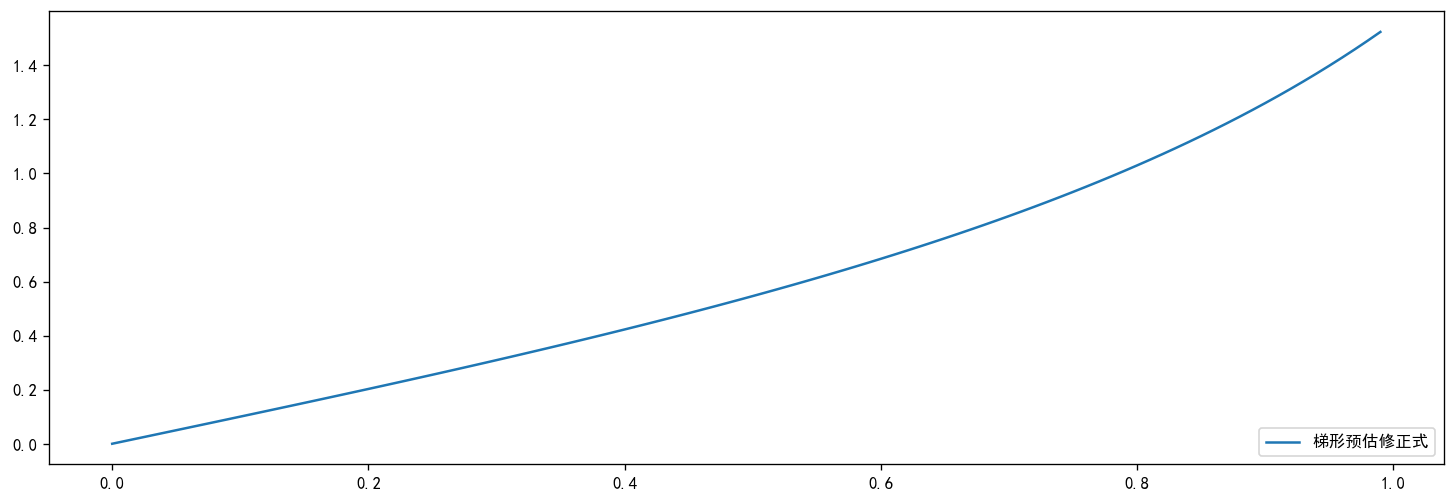

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(xxx, yyy, label='梯形预估修正式')
plt.legend(loc='lower right')
plt.savefig('6-3.pdf', bbox_inches='tight')

In [15]:
def rk4(f, a, b, ya, M):
    h = (b - a) / M
    T = np.linspace(a, b, M)
    Y = np.zeros(M)
    Y[0] = ya
    for j in range(M - 1):
        k1 = h * f(T[j], Y[j])
        k2 = h * f(T[j] + h / 2, Y[j] + k1 / 2)
        k3 = h * f(T[j] + h / 2, Y[j] + k2 / 2)
        k4 = h * f(T[j] + h, Y[j] + k3)
        Y[j + 1] = Y[j] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return T, Y

In [21]:
def f(t, y):
    return 1+y**2

T, Y = rk4(f, 0, 1.0, 0,100)
display(pd.DataFrame(list(zip(T, Y))[:-10], columns=['$x$', '$y$']))
display(pd.DataFrame(list(zip(t, y))[:-10], columns=['$x$', '$y$']))

,$x$,$y$
0,0.000000,0.000000
1,0.010101,0.010000
2,0.020202,0.020003
3,0.030303,0.030009
4,0.040404,0.040021
...,...,...
85,0.858586,1.138333
86,0.868687,1.161556
87,0.878788,1.185325
88,0.888889,1.209664


,$x$,$y$
0,0.000000,0.000000
1,0.010101,0.010000
2,0.020202,0.020001
3,0.030303,0.030005
4,0.040404,0.040014
...,...,...
85,0.858586,1.129006
86,0.868687,1.151753
87,0.878788,1.175018
88,0.888889,1.198825


In [22]:
def f(t,y):
    '''
    精确解为y=exp(-x)
    '''
    return 1+y*y


xxx=[]
yyy=[]
def improved_euler(f,a=0,b=1,ya=1,h=0.1,verbose=True):
    res = []
    xi = a 
    yi = ya
    
    
    while xi <= b: # 在求解区间范围
        yp = yi + h*f(xi, yi)
        y = yi + h/2 * (f(xi, yi) + f(xi, yp))
        if verbose:
            xxx.append(xi)
            yyy.append(yi)
            #print('xi:{:.4f}, yi:{:.6f}'.format(xi,yi))
        res.append(y)
        xi, yi = xi+h, y
    
    return res
res = improved_euler(f,a=0,b=1,ya=0,h=0.01,verbose=True)
#res

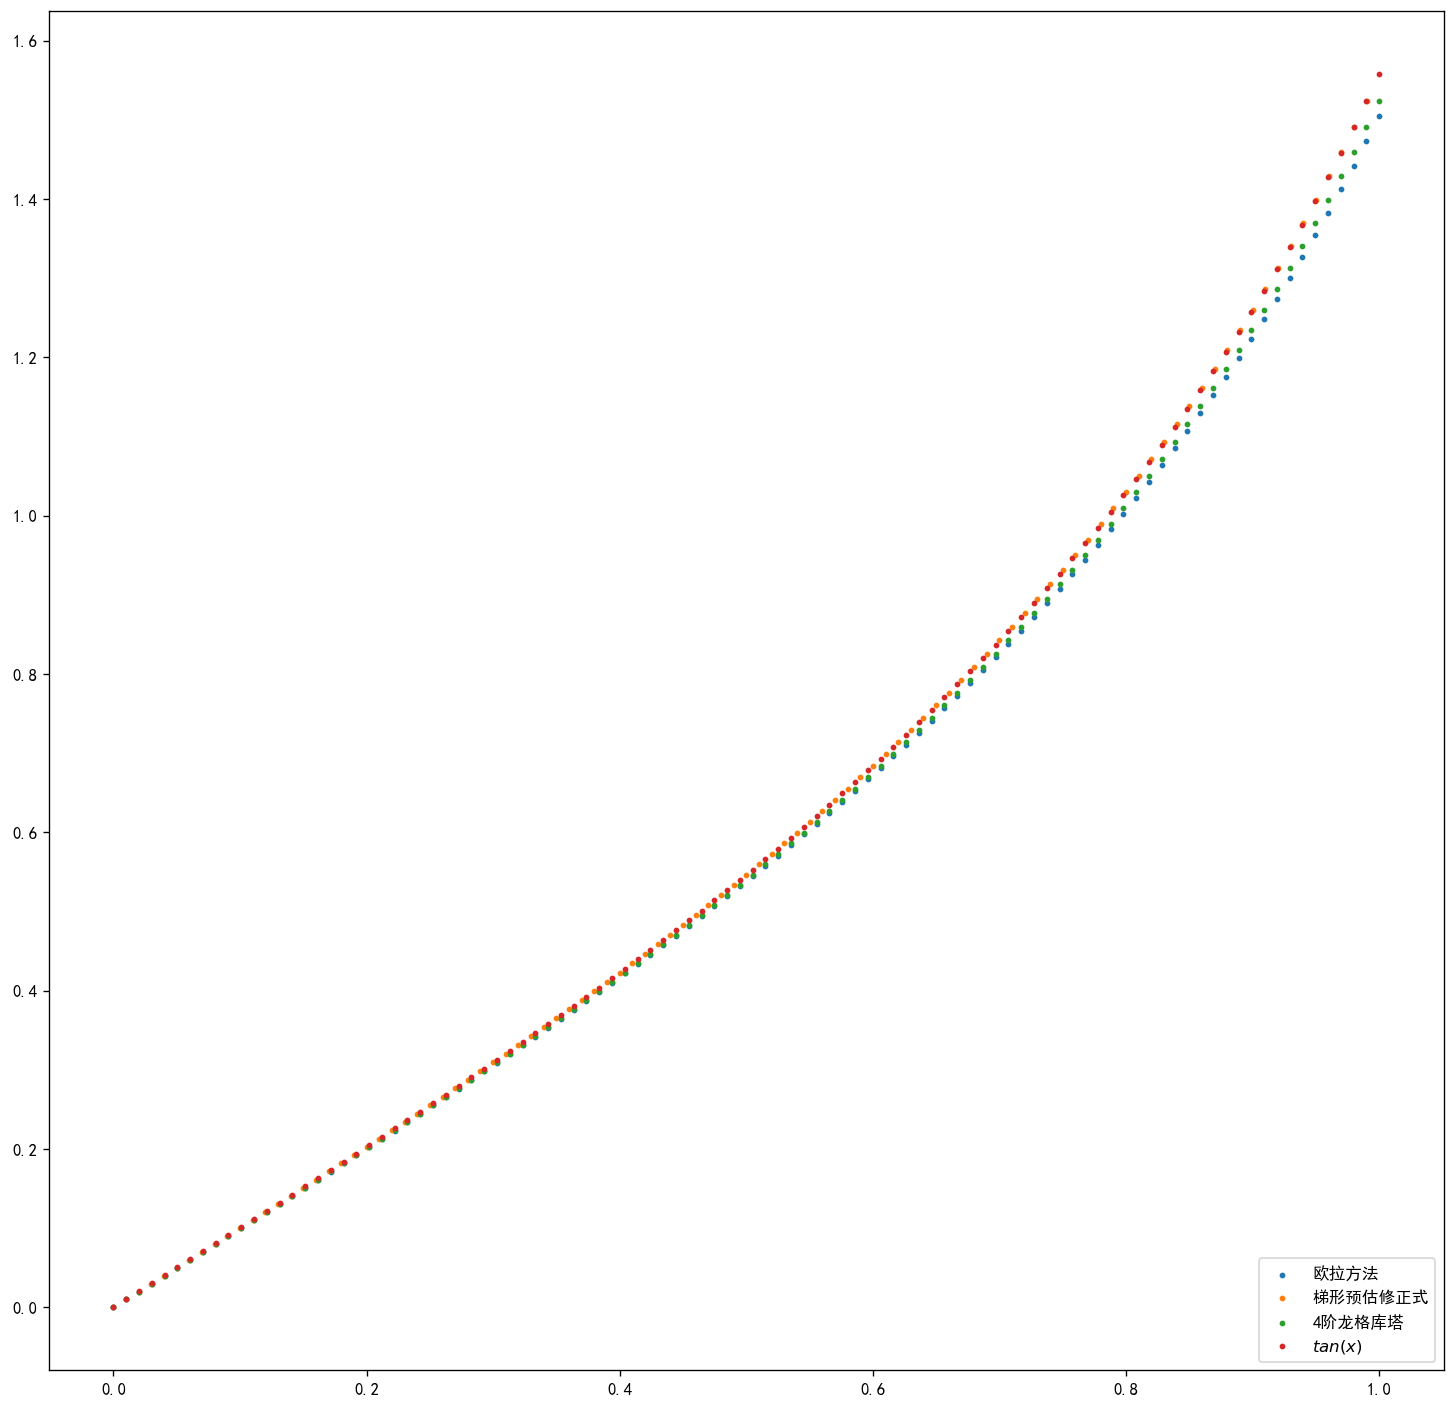

In [36]:
plt.figure(figsize=(15, 15))
#plt.subplot(1, 2, 1)
#T, Y = rk4(f, 0, 1.0, 0, 1000)
x=np.linspace(0,1,100)
plt.scatter(t, y, label='欧拉方法',s=6)
plt.scatter(xxx, yyy, label='梯形预估修正式',s=6)
plt.scatter(T, Y, label='4阶龙格库塔',s=6)
plt.scatter(x, np.tan(x), label='$tan(x)$',s=6)
plt.legend(loc='lower right')
plt.savefig('6-4.pdf')


NameError: name 'ans' is not defined

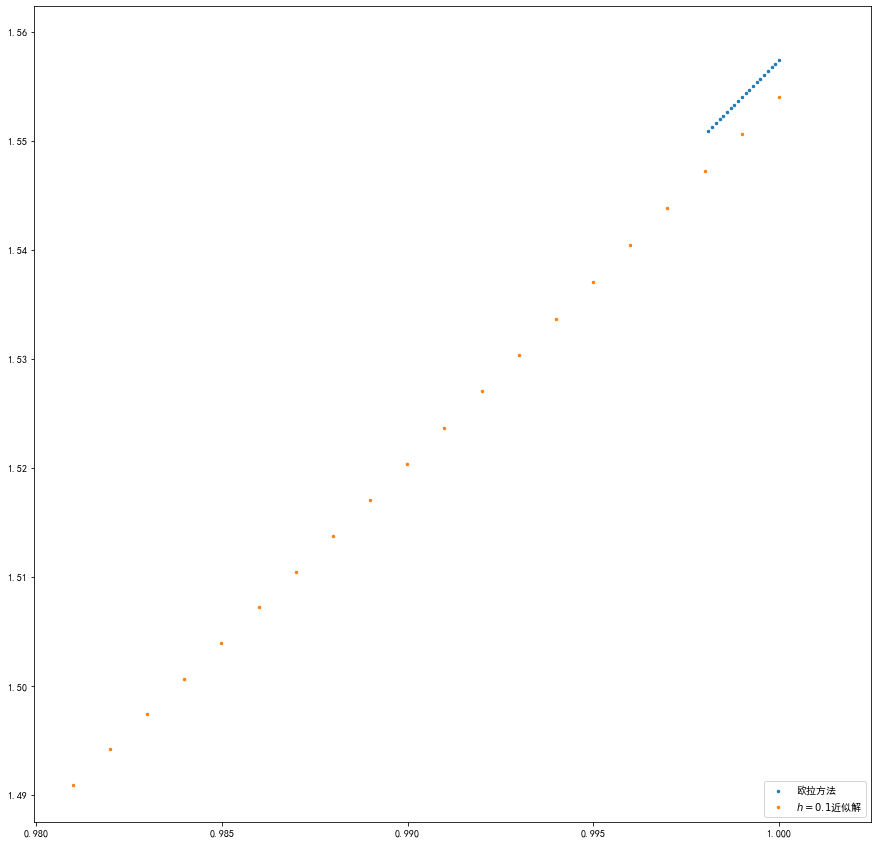

In [14]:
plt.figure(figsize=(15, 15))
#plt.subplot(1, 2, 1)
T, Y = rk4(f, 0, 1.0, 0, 1000)
plt.scatter(x[-20:], y1[-20:], label='欧拉方法',s=6)
plt.scatter(T[-20:], Y[-20:], label='$h=0.1$近似解',s=6)
plt.legend(loc='lower right')

In [ ]:
x[-20:]

用龙格库塔4阶方法求解描述振荡器的经典van der Pol微分方程
$$\left\{
\begin{aligned}
\frac{d^2y}{dt^2}-\mu(1-y^2)\frac{dy}{dt}+y=0,\\
y(0)=1,y'(0)=0
\end{aligned}
\right.$$
分别取$\mu=0.01,0.1,1$作图比较计算结果

In [5]:
u = 1


def ff1(w1, w2):
    return 0.01*(1-w1*w1)*w2-w1

def ff2(w1, w2):
    return 0.1*(1-w1*w1)*w2-w1

def ff3(w1, w2):
    return 1*(1-w1*w1)*w2-w1


def rk42(f, w1, w2, h, a, b):  # f:二阶导函数 w1: 函数值 w2:一阶导数值 a,b:范围
    M = int((b-a)/h)
    T1 = np.linspace(a, b, int(M))
    Y1 = np.zeros(M)
    Y2 = np.zeros(M)
    Y1[0] = w1
    Y2[0] = w2
    for j in range(M - 1):
        k11 = h * Y2[j]
        k12 = h * f(Y1[j], Y2[j])
        k21 = h * (Y2[j] + 0.5 * k12)
        k22 = h * f(Y1[j]+0.5*k11, Y2[j]+0.5*k12)
        k31 = h * (Y2[j]+0.5*k22)
        k32 = h * f(Y1[j]+0.5*k21, Y2[j]+0.5*k22)
        k41 = h * (Y2[j]+0.5*k32)
        k42 = h * f(Y1[j]+0.5*k31, Y2[j]+0.5*k32)
        #print(Y1[j])
        Y1[j+1] = Y1[j]+(k11+2*k21+2*k31+k41)/6
        Y2[j + 1] = Y2[j] + (k12 + 2 * k22 + 2 * k32 + k42) / 6

    return Y1, Y2

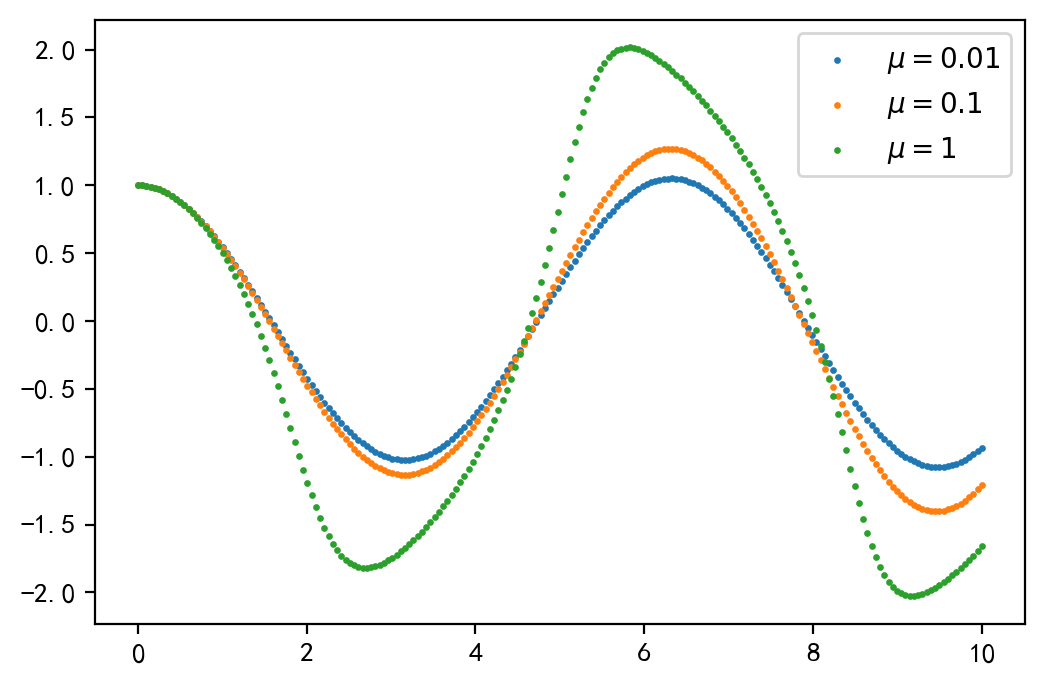

In [17]:
ydot1,mmm=rk42(ff1,1,0,0.05,0,10)
ydot2,mmm=rk42(ff2,1,0,0.05,0,10)
ydot3,mmm=rk42(ff3,1,0,0.05,0,10)
plt.rcParams['figure.dpi'] = 200
xdot= np.linspace(0, 10, 200)
plt.scatter(xdot, ydot1,label='$\mu=0.01$',s=2)
plt.scatter(xdot, ydot2,label='$\mu=0.1$',s=2)
plt.scatter(xdot, ydot3,label='$\mu=1$',s=2)
plt.legend()
plt.savefig('6-5.pdf',dpi=200)

In [6]:
rk42(ff, 1, 0, 0.1, 0, 1)


NameError: name 'rk42' is not defined


\begin{table}[]
\begin{tabular}{llllll}
x    & -2 & -1 & 0 & 1 & 2 \\
f(x) & 0  & 1  & 2 & 1 & 1
\end{tabular}
\end{table}
